In [4]:
import sys
for p in ['..']:
  if p not in sys.path:
    sys.path.insert(0, p)

from collections import namedtuple
import csv
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display import HTML

from digits.data import Env
from digits.explore import explore, viz_table

%matplotlib inline

env = Env('..')
env.assert_ready()
print("ready")

ready


In [5]:
model = 'tf'
variant = 'mnist'
e = explore(env, model, variant, 'test')

In [6]:
e.metrics.accuracy()

0.94421428571428567

In [7]:
e.metrics.gold_class_dist()

array([ 0.102     ,  0.11228571,  0.09971429,  0.1045    ,  0.10057143,
        0.08635714,  0.09678571,  0.1015    ,  0.19628571])

In [8]:
e.metrics.pred_class_dist()

array([ 0.09835714,  0.10921429,  0.10085714,  0.10857143,  0.10142857,
        0.09064286,  0.09742857,  0.09878571,  0.19471429])

In [9]:
HTML(viz_table(e.viz.correct_uncertain))

,index,gold_class,pred_class,p,entropy,proc_image
0,1,0,0,1.0,7.332370,
1,3,1,1,1.0,7.326466,
2,4,8,8,1.0,7.258412,
3,2,8,8,1.0,7.253057,
4,7,1,1,1.0,7.232010,
5,0,3,3,1.0,7.227662,
6,9,1,1,1.0,7.227662,
7,6,4,4,1.0,7.218177,
8,8,4,4,1.0,7.207116,
9,5,9,9,1.0,7.145984,


In [10]:
curve = pd.read_csv(env.resolve_model_file(model, variant, 'learning_curve.csv'))

In [11]:
curve.head()

,step,seen,train_acc,train_loss,valid_acc,valid_loss
0,0,0,0.113281,49777.40,0.125000,49676.10
1,10,1280,0.535156,11925.80,0.455078,13963.90
2,20,2560,0.730469,5554.62,0.742188,5077.27
3,30,3840,0.826172,3832.22,0.839844,3551.05
4,40,5120,0.833984,3501.24,0.867188,3637.15


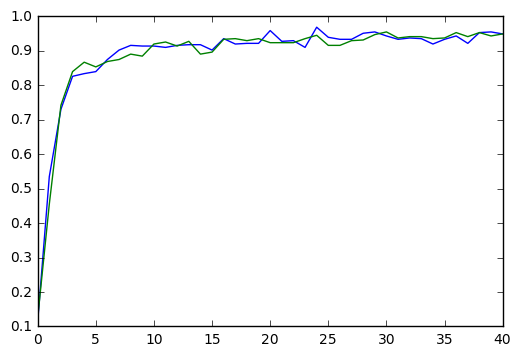

In [12]:
plt.plot(curve['train_acc'])
plt.plot(curve['valid_acc'])